In [14]:
# 이 코드에서는 구문 분석 및 형태소 분류을 수행한 후 시각화(ParseTree, WordCloud)하는 방법에 대해 알아봅니다. 
from nltk.help import upenn_tagset # 품사 약자가 뭔지 알려줌

upenn_tagset('N.*') # 형태소 태그세트 출력
upenn_tagset("NN.*") # 품사 약자가 뭔지 알려줌. .*을 붙이면 NN으로 시작하는 모든 태그 설명 출력. 
# upenn_tagset("JJ.*")
# upenn_tagset("VP")

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
NNPS: noun, proper, plural
    Americans Americas Amharas Amityvilles Amusements Anarcho-Syndicalists
    Andalusians Andes Andruses Angels Animals Anthony Antilles Antiques
    Apache Apaches Apocrypha ...
NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...
NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena over

In [17]:
from nltk import pos_tag
from nltk.tokenize import word_tokenize

sentence = 'The little bear saw the fat trout in the book'
tagged = pos_tag(word_tokenize(sentence)) # 품사 분석

### 출력한 품사 정보를 이용해서 규칙을 만든다.

사용할 정규식 설명 : 
- 있거나 없거나 : ?
- 없거나 여러개 있거나 : *
- 1개 이상 있거나(1-n) : +

Rules : 
~~~
NP: {<DT>?<JJ.*>*<NN.*>}
NP: {<DT>?<NN.*>}
~~~

In [18]:
from nltk.chunk.regexp import RegexpParser

# 형태소 분석 후 ParseTree에 저장(영어로 Parsetree 분석해보기)
# DT+NN이거나 NN인 것들을 찾아야 함. 
grammar = RegexpParser('NP : {<DT>?<NN.*>}')
phraseTree = grammar.parse(tagged)
phraseTree.pprint()

(S
  The/DT
  little/JJ
  (NP bear/NN)
  saw/VBD
  the/DT
  fat/JJ
  (NP trout/NN)
  in/IN
  (NP the/DT book/NN))


In [19]:
sentence = 'The little yellow dog barked at the cat'

tagged = pos_tag(word_tokenize(sentence))
rules = RegexpParser('''
            NP : {<DT>?<JJ.*>+<NN.*>}
        ''')

rules.parse(tagged).pprint()

(S
  (NP The/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  the/DT
  cat/NN)


~~~
1. ? => True or False (있거나, 없거나 딱 1개)
2. * => 0 : * (없거나, 여러개 있거나)
3. + => 1 : * (1개 있거나, 여러개 있거나)
~~~

In [21]:
from konlpy.tag import Kkma

sentence = '내 친구가 잠을 많이 잔다.'
tagged = Kkma().pos(sentence)
tagged

[('내', 'NP'),
 ('친구', 'NNG'),
 ('가', 'JKS'),
 ('잠', 'NNG'),
 ('을', 'JKO'),
 ('많이', 'MAG'),
 ('자', 'VV'),
 ('ㄴ다', 'EFN'),
 ('.', 'SF')]

In [ ]:
Kkma().tagset # 태그셋 전부 출력해보기

{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

In [36]:
rules = RegexpParser("""
    NP: {<N.*>+<JK.*>}
    VP: {<MA.*>*<VV.*><EF.*>}
""")
parseTree = rules.parse(tagged) # 객체로 만들어두면 이터러블한 객체가 생성되며, 서브트리를 탐색할 수 있게 된다. 
rules.parse(tagged).pprint()
parseTree.draw()

(S
  (NP 내/NP 친구/NNG 가/JKS)
  (NP 잠/NNG 을/JKO)
  (VP 많이/MAG 자/VV ㄴ다/EFN)
  ./SF)


Rules : 
~~~
NP: {<N.*>+<JK.*>} # 명사구 정의
VP: {<MA.*>*<VV.*><EF.*>} # 동사구 정의(종결형 어미로 끝나야 함.)
~~~


In [37]:
for subtree in parseTree.subtrees(): # 위에있는것은 3개니까 trigram으로 생각해볼 수 있음. 
        if subtree.label() == "NP":
            print(subtree)

(NP 내/NP 친구/NNG 가/JKS)
(NP 잠/NNG 을/JKO)


## 영어 문장으로 parsetree 뽑는 연습해보기

사용할 정규식 설명 :

- 있거나 없거나 : ?
- 없거나 여러개 있거나 : *
- 1개 이상 있거나(1-n) : +

rule 정의하기
- 2, 4번같은경우 중의성 문제 때문에 NP를 올바른 위치에 정의하기 어렵다.(rulesGeneral은 1, 2, 3, 4번 모두에서 꽤 잘 작동하지만 세부 트리는 수정해 주어야 함.)
- bag-of-word는 맨 마지막 엘리먼트만으로 구성되기 때문에, NP와 같이 어느 단어가 누구를 수식하는지에 대한 지역 정보를 잃어버린다. 따라서 parsetree를 구축해야 의미를 제대로 전달할 수 있다. 


In [41]:
# Exercise1
sentence = 'I shot an elephant in my pajamas'
tagged = pos_tag(word_tokenize(sentence)) # 품사 분석

# 정규식 패턴정의
grammar = RegexpParser(''' 
        N: {<NN.*>}
        P: {<IN.*>}
        V: {<VB.*>}
        Det: {<DT|PRP.*>}
        Adj: {<JJ>}
        NP: {<Det>?<N>|<PRP>}
        PP: {<P><NP>}
        VP: {<V><NP>}
        VP: {<VP><PP>}
        ''')

# parseTree 정의
phraseTree= grammar.parse(tagged)
phraseTree.pprint()
phraseTree.draw()

(S
  (Det I/PRP)
  (VP
    (VP (V shot/VBP) (NP (Det an/DT) (N elephant/NN)))
    (PP (P in/IN) (NP (Det my/PRP$) (N pajamas/NN)))))


In [46]:
# Exercise2
sentence = 'the dog saw a man in the park'

tagged = pos_tag(word_tokenize(sentence)) # 품사 분석

# 정규식 패턴정의
rules = RegexpParser(''' 
        N: {<NN>}
        Det: {<D.*>}
        V: {<V.*>}
        P: {<IN>}
        NP: {<D.*><N>$}
        PP: {<P><NP>}
        NP: {<D.*><N><PP>}
        NP: {<D.*><N>}
        VP: {<V><NP>}
''')

# parseTree 정의
phraseTree = grammar.parse(tagged)
phraseTree.pprint()
phraseTree.draw()

(S
  (NP (Det the/DT) (N dog/NN))
  (VP
    (VP (V saw/VBD) (NP (Det a/DT) (N man/NN)))
    (PP (P in/IN) (NP (Det the/DT) (N park/NN)))))


In [48]:
# Exercise3
sentence = 'the angry bear chased the frightened little squirrel'

tagged = pos_tag(word_tokenize(sentence)) # 품사 분석

# 정규식 패턴정의
rules = RegexpParser('''
        N: {<NN>$}
        Adj: {<JJ>}
        Det: {<PRP.*>|<D.*>}
        V: {<V.*>}    
        Nom: {<Adj><N>}
        N: {<NN>}
        Nom: {<N>}
        Nom: {<Adj><Nom>}
        NP: {<D.*><N.*>}
        VP: {<V.*><.*P>}
''')

# parseTree 정의
phraseTree = grammar.parse(tagged)
phraseTree.pprint()
phraseTree.draw()

(S
  (Det the/DT)
  (Adj angry/JJ)
  (NP (N bear/NN))
  (V chased/VBD)
  (Det the/DT)
  (Adj frightened/JJ)
  (Adj little/JJ)
  (NP (N squirrel/NN)))


In [64]:
# Exercise4
sentence = 'the little bear saw the fine fat trout in the brook'

tagged = pos_tag(word_tokenize(sentence)) # 품사 분석

# 정규식 패턴정의
rules = RegexpParser('''
        Adj: <JJ>{<NN>}<NN>
        Adj: {<JJ>}
        N: {<NN>}
        Det: {<DT>}
        P: {<IN>}
        V: {<VB.*>} 
        Nom: {<Adj>*<N>+}
        NP: {<Det><Nom>}
        PP: {<P><NP>}
        VP: {<V><NP>}
        VP: {<VP><PP>}
''')

# parseTree 정의
phraseTree = grammar.parse(tagged)
phraseTree.pprint()
phraseTree.draw()

(S
  (Det the/DT)
  (Adj little/JJ)
  (NP (N bear/NN))
  (V saw/VBD)
  (Det the/DT)
  (Adj fine/JJ)
  (NP (N fat/NN))
  (NP (N trout/NN))
  (PP (P in/IN) (NP (Det the/DT) (N brook/NN))))


## WordCloud로 시각화해보기

In [65]:
# 태그들의 빈도를 갖고 클라우드를 그려 시각화해주는 모듈
!pip install wordcloud

In [71]:
from konlpy.corpus import kolaw

corpus = kolaw.open(kolaw.fileids()[0]).read()
tagged = Kkma().pos(corpus)
# Kkma().tagset # 태그셋 전체 출력
result = [_[0] for _ in tagged if len(_[0]) > 1 and not (_[1].startswith('J') or _[0].startswith('ㄴ'))]

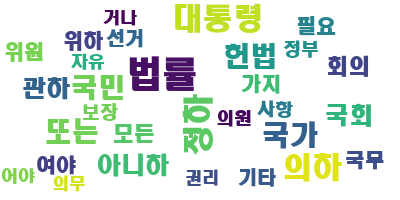

In [72]:
from wordcloud import WordCloud
from nltk import Text

textObj = Text(result)
textObj.vocab().most_common(20)

Fontpath = "C:/windows/fonts/HMKMRHD.ttf" # 한글 깨짐 방지를 위해 폰트를 지정해주기
wc = WordCloud(font_path=Fontpath, max_words=30, background_color="white")

termList = textObj.vocab()
wc.generate_from_frequencies(termList)
wc.to_image()

In [76]:
from konlpy.corpus import kolaw
from konlpy.tag import Kkma # 꼬마 모듈(형태소분석기) 임포트
import os

# 경제, IT과학 분야 기사를 담기 위한 빈 객체 두개 생성
corpus_Eco = ""
corpus_ITSci = ""
txtfilespath = "C:/Users/brsta/ICT_AI_AdvanceClass_NLP/0314_DownloadedNewstxts/"
# txtfilespath = "./0314_DownloadedNewstxts" # 긁어왔던 기사가 저장되어 있는 폴더

for file in os.listdir("C:/Users/brsta/ICT_AI_AdvanceClass_NLP/0314_DownloadedNewstxts/"):
    if file.endswith(".txt") and file.startswith("경제"): # '경제'로 시작하고 .txt로 끝나는 파일
        with open("C:/Users/brsta/ICT_AI_AdvanceClass_NLP/0314_DownloadedNewstxts/" + file, encoding = "utf-8") as f:
            corpus_Eco += f.read() # 읽어오는 내용들을 계속해서 추가

for file in os.listdir("C:/Users/brsta/ICT_AI_AdvanceClass_NLP/0314_DownloadedNewstxts/"):
    if file.endswith(".txt") and file.startswith("IT과학"):
        with open("C:/Users/brsta/ICT_AI_AdvanceClass_NLP/0314_DownloadedNewstxts/" + file, encoding = "utf-8") as f:
            corpus_ITSci += f.read()

tokens = [_[0] for _ in Kkma().pos(corpus_Eco) # 형태소 분석
    if len(_[0]) > 1 and _[1].startswith("N")] # 어미에 해당하는 부분 없애기
tokens2 = [_[0] for _ in Kkma().pos(corpus_ITSci) # 형태소 분석
    if len(_[0]) > 1 and _[1].startswith("N")] # 어미에 해당하는 부분 없애기

In [77]:
from nltk import Text
textObj = Text(tokens)
textObj2 = Text(tokens2)

In [78]:
from wordcloud import WordCloud

Fontpath = "C:/windows/fonts/HMKMRHD.ttf" # 한글 깨짐 방지를 위해 폰트를 지정해주기
wc = WordCloud(font_path=Fontpath, max_words=30, background_color="white")

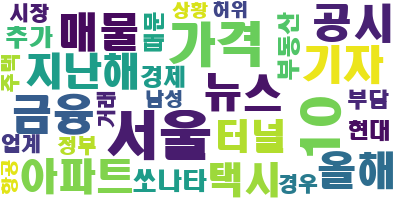

In [75]:
termList = textObj.vocab()
wc.generate_from_frequencies(termList)
wc.to_image() # 이미지로 출력. 글자만 넣어야 함!!(튜플 넣으면 안돌아감.)

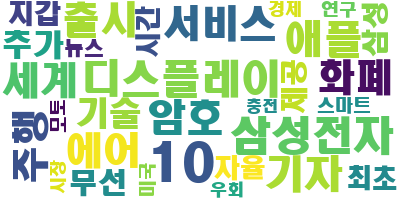

In [79]:
termList2 = textObj2.vocab()
wc.generate_from_frequencies(termList2)
wc.to_image() # 생활문화

In [80]:
# 자연어처리 공부를 위한 MOOC강의 추천 : 
"http://www.cs.virginia.edu/~hw5x/Course/IR2015/_site/lectures/" # 버지니아 공대 Information retrieval MOOC 강좌 링크

'http://www.cs.virginia.edu/~hw5x/Course/IR2015/_site/lectures/'